# Assess the HYDROGFD runoffs dataset over the Arctic basin

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors

%matplotlib inline

/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
! date

Wed May 17 07:16:27 GMT 2023


>> # Read CREG025.L75 grid

In [5]:
#ds_grd=xr.open_dataset('./CREG025.L75-NEMO420_tmask.nc')
ds_dfg=xr.open_dataset('./CREG025.L75_domain_cfg.nc')

In [6]:
ds_dfg

<xarray.Dataset>
Dimensions:       (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    jpiglo        int32 ...
    jpjglo        int32 ...
    jpkglo        int32 ...
    jperio        int32 ...
    ln_zco        int32 ...
    ln_zps        int32 ...
    ln_sco        int32 ...
    ln_isfcav     int32 ...
    glamt         (t, y, x) float64 ...
    glamu         (t, y, x) float64 ...
    glamv         (t, y, x) float64 ...
    glamf         (t, y, x) float64 ...
    gphit         (t, y, x) float64 ...
    gphiu         (t, y, x) float64 ...
    gphiv         (t, y, x) float64 ...
    gphif         (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) fl

In [7]:
# Define a land-sea mask in an other way
tmask2D=xr.where(ds_dfg['bottom_level']>0,1.,0.)

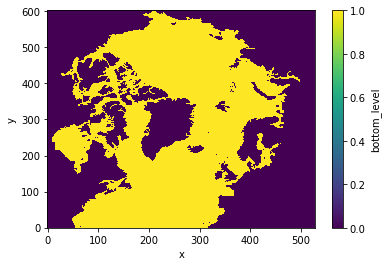

In [8]:
tmask2D.plot()

>> # Read CREG12.L75 grid

In [9]:
ds_dfg12=xr.open_dataset('./CREG12.L75_domain_cfg.nc')

In [10]:
ds_msk12=xr.open_dataset('./CREG12.L75-REF09_tmask.nc')

In [11]:
tmask2D12=ds_msk12['tmask']

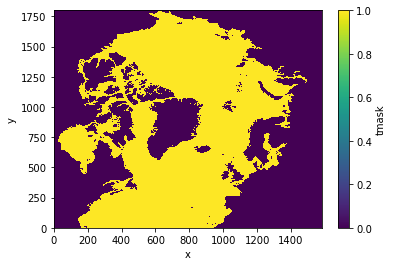

In [12]:
tmask2D12.plot()

# Read CREG12.L75 HYDROGFD runoffs data
- Read just 1 year to perform test of extraction

In [13]:
DATAIN='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG12.L75/DATA_FORCING/RUNOFFS/HYDROGFD/'
ds_isbarnf=xr.open_mfdataset(DATAIN+'FixedLandRunoff_CREG12_ReNat_HydroGFD_HBC_runoff_monthly_y1981.nc',decode_times=False) #,concat_dim='time_counter')
ds_isbarnf

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 1580, y: 1801)
Coordinates:
  * time_counter  (time_counter) float64 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    nav_lat       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(12, 1801, 1580), chunksize=(12, 1801, 1580)>
    socoefr       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    tmask         (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>

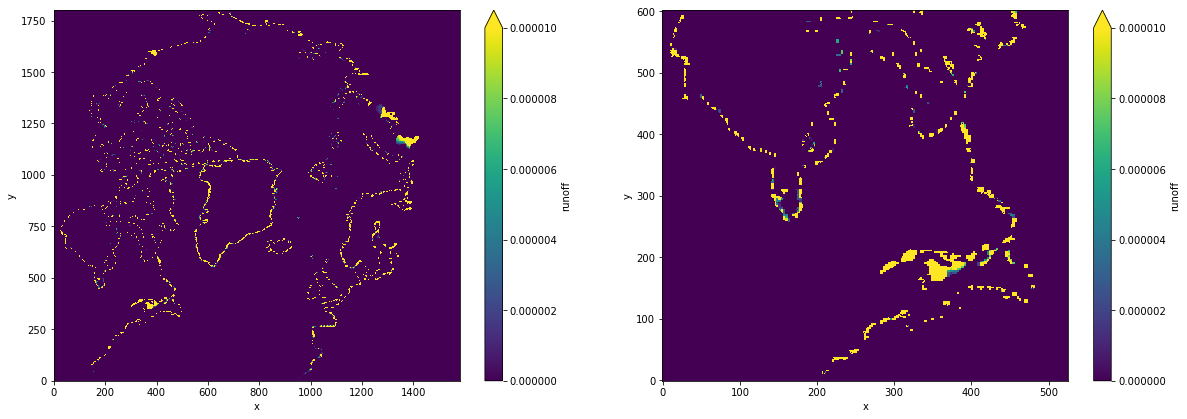

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(221)
ds_isbarnf['runoff'].mean('time_counter').plot(vmax=0.00001)

plt.subplot(222)
ds_isbarnf['runoff'].mean('time_counter').isel(x=slice(18,544),y=slice(187,789)).plot(vmax=0.00001)

In [15]:
subdom_isbarnf=ds_isbarnf

In [16]:
subdom_isbarnf

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 1580, y: 1801)
Coordinates:
  * time_counter  (time_counter) float64 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    nav_lat       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(12, 1801, 1580), chunksize=(12, 1801, 1580)>
    socoefr       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    tmask         (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>

In [17]:
subdom_isbarnf['socoefr_msk']=(('y','x'),subdom_isbarnf['socoefr']+tmask2D12[:,:])
subdom_isbarnf

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 1580, y: 1801)
Coordinates:
  * time_counter  (time_counter) float64 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    nav_lat       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(12, 1801, 1580), chunksize=(12, 1801, 1580)>
    socoefr       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    tmask         (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    socoefr_msk   (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

# Significance of the subdom socoefr_msk variable
- 0 means land 
- 0.5 means river discharge over land == not good  
- 1 means ocean 
- 1.5 means river discharge into the ocean == we're happy with that

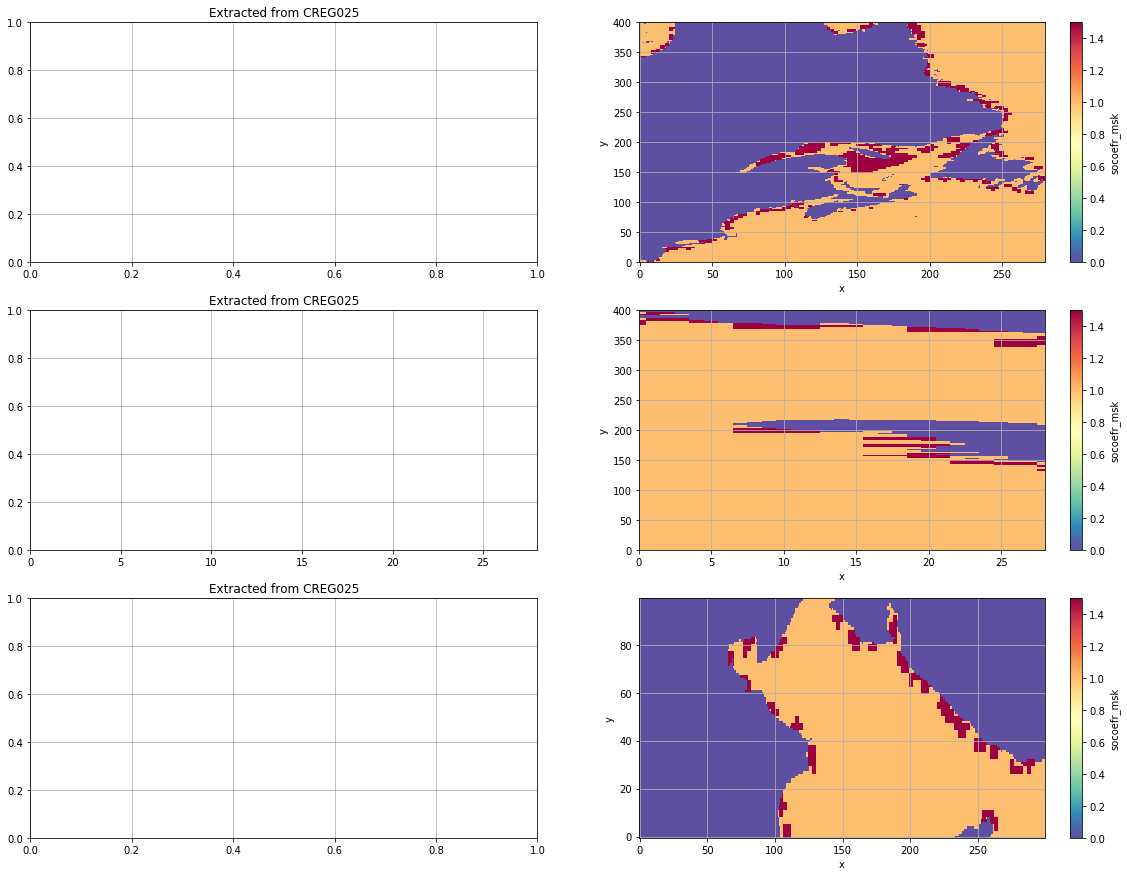

In [18]:
plt.figure(figsize=(20,15))

# Area over south-western side of the domain
plt.subplot(321)
plt.title('Extracted from CREG025')
#subdom_DTB['socoefr_msk'].isel(x=slice(0,80),y=slice(0,60)).plot(cmap='Spectral_r')
plt.grid(True)

plt.subplot(322)
plt.title('Extracted from HydroGFD')
subdom_isbarnf['socoefr_msk'].isel(x=slice(220,500),y=slice(200,600)).plot(cmap='Spectral_r')
plt.grid(True)

# Area over south-eastern side of the domain
plt.subplot(323)
plt.title('Extracted from CREG025')
#subdom_DTB['socoefr_msk'].isel(x=slice(500,528),y=slice(0,60)).plot(cmap='Spectral_r',vmax=1.5)
plt.xlim([0,28])
plt.grid(True)

plt.subplot(324)
plt.title('Extracted from HydroGFD')
subdom_isbarnf['socoefr_msk'].isel(x=slice(1200,1400),y=slice(1000,1400)).plot(cmap='Spectral_r',vmax=1.5)
plt.xlim([0,28])
plt.grid(True)

# Area over the Bering strait
plt.subplot(325)
plt.title('Extracted from CREG025')
#subdom_DTB['socoefr_msk'].isel(x=slice(180,260),y=slice(550,603)).plot(cmap='Spectral_r')
plt.grid(True)

plt.subplot(326)
plt.title('Extracted from HydroGFD')
subdom_isbarnf['socoefr_msk'].isel(x=slice(500,800),y=slice(1700,1800)).plot(cmap='Spectral_r')
plt.grid(True)


# Attempt to explore interactively the socoefr_msk variable over the whole extracted domain to check that the ANHA4 coastline fit the CREG025 one 

In [19]:
#import hvplot.xarray

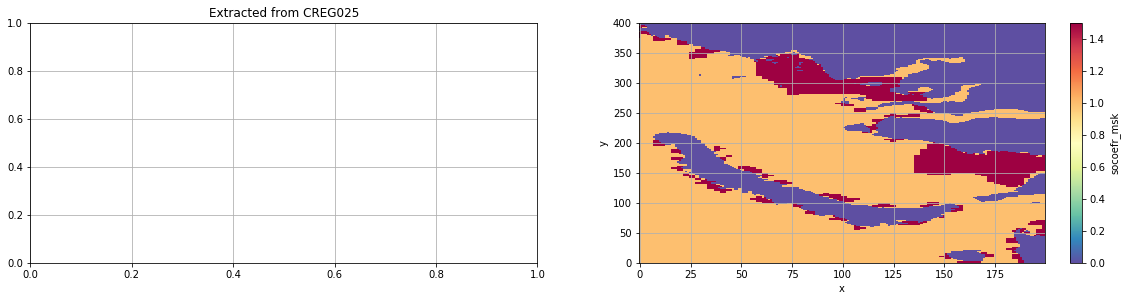

In [20]:
plt.figure(figsize=(20,15))

iss=1200 ; iee=1400
jss=1000 ; jee=1400

# Area over south-western side of the domain
plt.subplot(321)
plt.title('Extracted from CREG025')
#subdom_DTB['socoefr_msk'].isel(x=slice(iss,iee),y=slice(jss,jee)).plot(cmap='Spectral_r')
plt.grid(True)

plt.subplot(322)
plt.title('Extracted from HydroGFD')
subdom_isbarnf['socoefr_msk'].isel(x=slice(iss,iee),y=slice(jss,jee)).plot(cmap='Spectral_r')
plt.grid(True)



# Define a proper Arctic box following Haine et al. GPC2015

In [21]:
def Arctic_area(coord,mask): 
    # Define a proper Arctic box following Haine et al. GPC2015
    # including all Arctic area + CAA + north to Davis, FRAM and Bering straits as east to BSO
    tmskBFGBIG=xr.where(coord['gphit'] < 62.,0., mask)
    # Remove the Baffin bay area
    tmskBFGBIG=xr.where((coord['glamt'] >= -90.) & (coord['glamt'] < -45.) & (coord['gphit'][:,:] <= 80.), 0., tmskBFGBIG )
    # Adjust the Baffin bay area north to Davis Strait 66.25N
    tmskBFGBIG=xr.where((coord['glamt'] >= -70.) & (coord['glamt'] < -45.) & (coord['gphit'] >= 62.) & (coord['gphit'] < 66.25), 0., tmskBFGBIG) 
    tmskBFGBIG=xr.where((coord['glamt'] >= -70.) & (coord['glamt'] < -65.) & (coord['gphit'] >= 66.25) & (coord['gphit'] < 67.) , 0., tmskBFGBIG)
    # Remove all GIN seas area
    tmskBFGBIG=xr.where((coord['glamt'] < 17.) & (coord['glamt'] > -45.) & (coord['gphit'] < 79.), 0., tmskBFGBIG)
    # Remove Hudson area
    tmskBFGBIG=xr.where((coord['glamt'] < -70.) & (coord['glamt'] > -82. ) & (coord['gphit'] < 70.5), 0., tmskBFGBIG)
    tmskBFGBIG=xr.where((coord['glamt'] <= -82.) & (coord['glamt'] > -100.) & (coord['gphit'] < 67.), 0., tmskBFGBIG)
    # Adriatic area 
    tmskBFGBIG=xr.where((coord['glamt'] < 30.) & (coord['glamt'] > 17.) & (coord['gphit'] < 68.), 0., tmskBFGBIG)

    return tmskBFGBIG

In [22]:
tmskBFGBIG = Arctic_area(ds_dfg,tmask2D)
tmskBFGBIG12 = Arctic_area(ds_dfg12,tmask2D12)

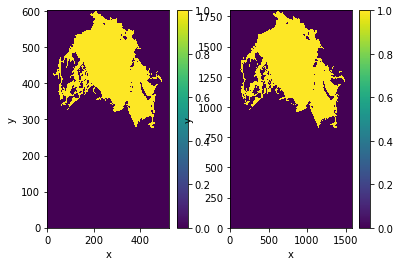

In [23]:
plt.subplot(121)
tmskBFGBIG.plot() 
plt.subplot(122)
tmskBFGBIG12.plot()

In [24]:
# Remove also the ACC area
tmskBFGBIG=xr.where((ds_dfg['glamt'] < -60.) & (ds_dfg['glamt'] > -120. ) & (ds_dfg['gphit'] < 80), 0., tmskBFGBIG)
tmskBFGBIG12=xr.where((ds_dfg12['glamt'] < -60.) & (ds_dfg12['glamt'] > -120. ) & (ds_dfg12['gphit'] < 80), 0., tmskBFGBIG12)

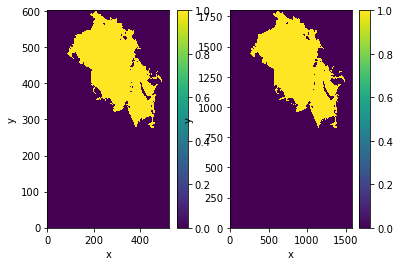

In [25]:
plt.subplot(121)
tmskBFGBIG.plot() 
plt.subplot(122)
tmskBFGBIG12.plot()

In [26]:
# Remove also the ACC area
tmskBFGBIG=xr.where((ds_dfg['glamt'] < -120.) & (ds_dfg['glamt'] > -125. ) & (ds_dfg['gphit'] < 75), 0., tmskBFGBIG)
tmskBFGBIG=xr.where((ds_dfg['glamt'] < -60.) & (ds_dfg['glamt'] > -90. ) & (ds_dfg['gphit'] < 83), 0., tmskBFGBIG)
tmskBFGBIG12=xr.where((ds_dfg12['glamt'] < -120.) & (ds_dfg12['glamt'] > -125. ) & (ds_dfg12['gphit'] < 75), 0., tmskBFGBIG12)
tmskBFGBIG12=xr.where((ds_dfg12['glamt'] < -60.) & (ds_dfg12['glamt'] > -90. ) & (ds_dfg12['gphit'] < 83), 0., tmskBFGBIG12)

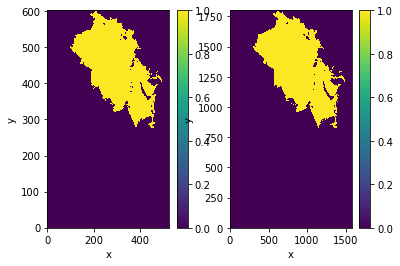

In [27]:
plt.subplot(121)
tmskBFGBIG.plot() 
plt.subplot(122)
tmskBFGBIG12.plot()

# Compute the sum over the CREG domain

### > HYDROGFD over the CREG domain data set

In [28]:
DATAINI='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG025.L75/DATA_FORCING/RUNOFFS/HYDROGFD/'
ds_rnfhpeX=xr.open_mfdataset(DATAINI+'CREG025_ReNat_HydroGFD_HBC_runoff_monthly_y*.nc',concat_dim='time_counter')

# Redefine the time axis properly (because year 1981 has been duplicated backward for the 3 previous year 1978-1980)
ds_rnfhpe=xr.Dataset()
ds_rnfhpe['sorunoff']=(('time_counter','y','x'),ds_rnfhpeX['sorunoff'])
ds_rnfhpe['socoefr']=(('y','x'),ds_rnfhpeX['socoefr'][0,:,:])
ds_rnfhpe.coords['nav_lon']=(('y','x'),ds_rnfhpeX['nav_lon'])
ds_rnfhpe.coords['nav_lat']=(('y','x'),ds_rnfhpeX['nav_lat'])

ds_rnfhpe.attrs=ds_rnfhpeX.attrs
ds_rnfhpe.coords['time_counter']=pd.date_range(start=str(1978)+'-01',end=str(2020)+'-12',freq="MS")+pd.DateOffset(days=14)
ds_rnfhpe

<xarray.Dataset>
Dimensions:       (time_counter: 516, x: 528, y: 603)
Coordinates:
    nav_lon       (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
    nav_lat       (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175
  * time_counter  (time_counter) datetime64[ns] 1978-01-15 ... 2020-12-15
Dimensions without coordinates: x, y
Data variables:
    sorunoff      (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    socoefr       (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    source:   HYPE ReNat runoff for HydroGFD BaySys run for 1981 to 2019 (10-...

In [29]:
DATAINI='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG12.L75/DATA_FORCING/RUNOFFS/HYDROGFD/'
ds_rnfhpeX=xr.open_mfdataset(DATAINI+'FixedLandRunoff_CREG12_ReNat_HydroGFD_HBC_runoff_monthly_y*.nc',concat_dim='time_counter')

# Redefine the time axis properly
ds_rnfhpe12=xr.Dataset()
ds_rnfhpe12['runoff']=(('time_counter','y','x'),ds_rnfhpeX['runoff'])
ds_rnfhpe12['socoefr']=(('y','x'),ds_rnfhpeX['socoefr'][0,:,:])
ds_rnfhpe12['tmask']=(('y','x'),ds_rnfhpeX['tmask'][0,:,:])
ds_rnfhpe12['nav_lon']=(('y','x'),ds_rnfhpeX['nav_lon'][0,:,:])
ds_rnfhpe12['nav_lat']=(('y','x'),ds_rnfhpeX['nav_lat'][0,:,:])

ds_rnfhpe12.attrs=ds_rnfhpeX.attrs
ds_rnfhpe12.coords['time_counter']=pd.date_range(start=str(1981)+'-01',end=str(2020)+'-12',freq="MS")+pd.DateOffset(days=14)
ds_rnfhpe12

<xarray.Dataset>
Dimensions:       (time_counter: 480, x: 1580, y: 1801)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1981-01-15 ... 2020-12-15
Dimensions without coordinates: x, y
Data variables:
    runoff        (time_counter, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    socoefr       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmask         (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nav_lon       (y, x) float32 -93.66704 -93.58371 ... 102.04508 101.97702
    nav_lat       (y, x) float32 25.583187 25.583206 ... 55.075264 55.05175

In [30]:
# To convert kg.s-1 to km3/year
alpha=1e-3*1e-9*365*86400.

In [31]:
def Arc_sum(ds_rnf,coord,mask,alpha,var='sorunoff',varout='sorunoff_sum'):
    ds_sum=xr.Dataset()
    ds_sum[varout]=(('time_counter'),((ds_rnf[var][:,:,:]*mask[0,:,:]*\
                                                    coord['e1t'].isel(t=0)*\
                                                    coord['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))
    ds_sum[varout].attrs={'units':'Sv'}
    ds_sum.coords['time_counter']=(('time_counter'),ds_rnf['time_counter'])
    
    return ds_sum

In [32]:
ds_rnf_mon=Arc_sum(ds_rnfhpe,ds_dfg,tmskBFGBIG,alpha)
ds_rnf_mon12=Arc_sum(ds_rnfhpe12,ds_dfg12,tmskBFGBIG12,alpha,var='runoff')

In [33]:
# Resample at a yearly frequency 
def year_resamp(ds_rnf,isba_syear,isba_eyear):    
    ds_year=xr.Dataset()

    ds_year['sorunoff_sum']=(('time_counter'),ds_rnf['sorunoff_sum'].resample(time_counter="1Y").mean())
    ds_year['sorunoff_sum'].attrs={'units':'Sv'}
    ds_year.coords['time_counter']=pd.date_range(start=str(isba_syear),end=str(isba_eyear+1),freq="1Y")+pd.DateOffset(days=-183)
    
    return ds_year

In [34]:
syear=1978 ; eyear=2020
ds_rnf_year=year_resamp(ds_rnf_mon,syear,eyear)
syear=1981 ; eyear=2020
ds_rnf_year12=year_resamp(ds_rnf_mon12,syear,eyear)

In [35]:
def mean_std(ds_in):
    # Colmpute the mean & Std
    syear_S1=1981  ;  eyear_S1=2000 
    ds_in['sorunoff_Mean_S1']=ds_in['sorunoff_sum'].sel(time_counter=slice(str(syear_S1),str(eyear_S1))).mean()
    ds_in['sorunoff_Std_S1']=ds_in['sorunoff_sum'].sel(time_counter=slice(str(syear_S1),str(eyear_S1))).std()
    ds_in['sorunoff_Mean_S1'].attrs={'units':'km3.year-1','long name':'Mean over 1981-2000'}
    ds_in['sorunoff_Std_S1'].attrs={'units':'km3.year-1','long name':'Std dev over 1981-2000'}

    syear_S2=2000  ; eyear_S2=2020
    ds_in['sorunoff_Mean_S2']=ds_in['sorunoff_sum'].sel(time_counter=slice(str(syear_S2),str(eyear_S2))).mean()
    ds_in['sorunoff_Std_S2']=ds_in['sorunoff_sum'].sel(time_counter=slice(str(syear_S2),str(eyear_S2))).std()
    ds_in['sorunoff_Mean_S2'].attrs={'units':'km3.year-1','long name':'Mean over 2000-2020'}
    ds_in['sorunoff_Std_S2'].attrs={'units':'km3.year-1','long name':'Std dev over 2000-2020'}
    
    return ds_in

In [36]:
ds_rnf_year=mean_std(ds_rnf_year)
ds_rnf_year12=mean_std(ds_rnf_year12)

In [37]:
ds_rnf_year12

<xarray.Dataset>
Dimensions:           (time_counter: 40)
Coordinates:
  * time_counter      (time_counter) datetime64[ns] 1981-07-01 ... 2020-07-01
Data variables:
    sorunoff_sum      (time_counter) float64 4.847e+03 4.586e+03 ... 4.563e+03
    sorunoff_Mean_S1  float64 3.599e+03
    sorunoff_Std_S1   float64 411.3
    sorunoff_Mean_S2  float64 4.262e+03
    sorunoff_Std_S2   float64 296.9

In [38]:
if False: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    plt.title('HydorGFD monthly runoffs ')
    (ds_rnf_mon['sorunoff_sum']).plot(color='r',linestyle='dashed',label='Hydro CREG025')
    (ds_rnf_mon12['sorunoff_sum']).plot(color='g',label='Hydro CREG12')
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1979','2021'])
    plt.ylim([0., 14000.])
    plt.grid()
    plt.legend()

    savefig=False
    if savefig: plt.savefig('./FIGURES/Runoff_CREG025_vs_CREG12_HYDROGFD_Arctic_Monthly_y19792020.pdf')



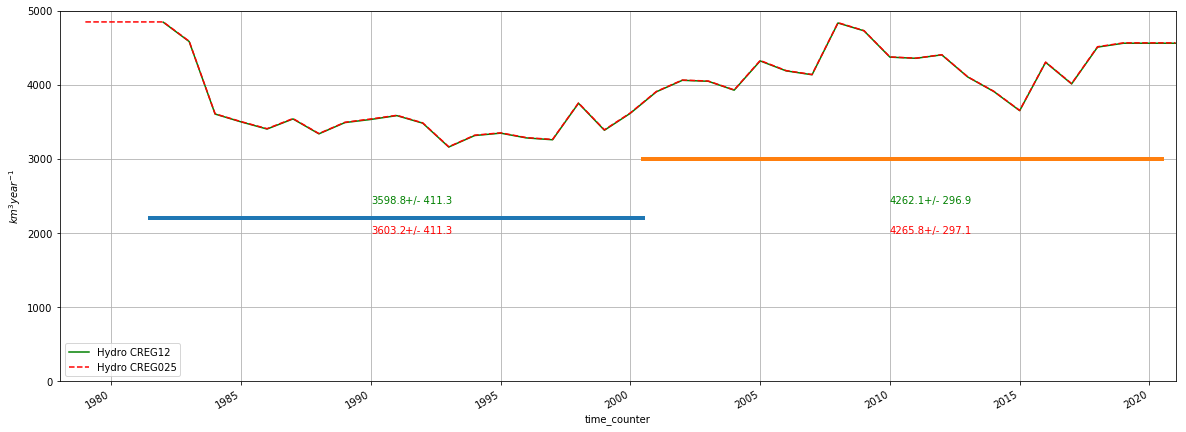

In [39]:
if True: 
    syear_S1=1981  ;  eyear_S1=2000 
    syear_S2=2000  ;  eyear_S2=2020

    plt.figure(figsize=(20,15))
    ax=plt.subplot(211)
    plt.title('Yearly mean runoffs computed over the Arctic basin')
    (ds_rnf_mon12['sorunoff_sum'].resample(time_counter='1Y').mean()).plot(color='g',label='Hydro CREG12')
    (ds_rnf_mon['sorunoff_sum'].resample(time_counter='1Y').mean()).plot(linestyle='dashed',color='r',label='Hydro CREG025')
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1978','2021'])
    plt.ylim([0., 5000.])
    plt.grid()

    plt.plot(pd.date_range(start=str(syear_S1),end=str(eyear_S1+1),freq="1Y")+pd.DateOffset(days=-183), np.ones(eyear_S1-syear_S1+1)*2200., linewidth=4, linestyle='solid')
    plt.plot(pd.date_range(start=str(syear_S2),end=str(eyear_S2+1),freq="1Y")+pd.DateOffset(days=-183), np.ones(eyear_S2-syear_S2+1)*3000., linewidth=4, linestyle='solid')


    ax.text('1990', 2000.,str(np.round(np.array(ds_rnf_year['sorunoff_Mean_S1']),decimals=1)), color='r')
    ax.text('1991.5', 2000.,'+/- '+str(np.round(np.array(ds_rnf_year['sorunoff_Std_S1']),decimals=1)), color='r')
    ax.text('2010', 2000.,str(np.round(np.array(ds_rnf_year['sorunoff_Mean_S2']),decimals=1)), color='r')
    ax.text('2011.5', 2000.,'+/- '+str(np.round(np.array(ds_rnf_year['sorunoff_Std_S2']),decimals=1)), color='r')

    ax.text('1990', 2400.,str(np.round(np.array(ds_rnf_year12['sorunoff_Mean_S1']),decimals=1)), color='g')
    ax.text('1991.5', 2400.,'+/- '+str(np.round(np.array(ds_rnf_year12['sorunoff_Std_S1']),decimals=1)), color='g')
    ax.text('2010', 2400.,str(np.round(np.array(ds_rnf_year12['sorunoff_Mean_S2']),decimals=1)), color='g')
    ax.text('2011.5', 2400.,'+/- '+str(np.round(np.array(ds_rnf_year12['sorunoff_Std_S2']),decimals=1)), color='g')

    plt.legend()
    savefig=False
    if savefig: plt.savefig('./FIGURES/Runoff_CREG025_vs_CREG12_HYDROGFD_Arctic_Yearly_y19802020.pdf')


># Define all area > 65°N

In [40]:
tmsk_ARC=xr.where(ds_dfg['gphit'] < 65., 0., tmask2D)
tmsk_ARC12=xr.where(ds_dfg12['gphit'] < 65., 0., tmask2D12)

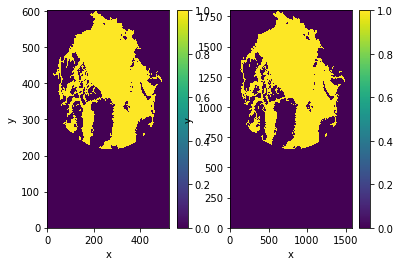

In [41]:
if True: 
    plt.subplot(121)
    tmsk_ARC.plot()
    plt.subplot(122)
    tmsk_ARC12.plot()

> # ISBA for lat > 65°N

In [42]:
ds_rnf_mon=Arc_sum(ds_rnfhpe,ds_dfg,tmsk_ARC,alpha,varout='sorunoff_sum_Arc')
ds_rnf_mon12=Arc_sum(ds_rnfhpe12,ds_dfg12,tmsk_ARC12,alpha,var='runoff',varout='sorunoff_sum_Arc')

In [43]:
ds_rnf_mon

<xarray.Dataset>
Dimensions:           (time_counter: 516)
Coordinates:
  * time_counter      (time_counter) datetime64[ns] 1978-01-15 ... 2020-12-15
Data variables:
    sorunoff_sum_Arc  (time_counter) float64 1.419e+03 1.268e+03 ... 2.628e+03

In [44]:
ds_rnf_year['sorunoff_sum_Arc']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Arc'].resample(time_counter="1Y").mean())
ds_rnf_year12['sorunoff_sum_Arc']=(('time_counter'),ds_rnf_mon12['sorunoff_sum_Arc'].resample(time_counter="1Y").mean())

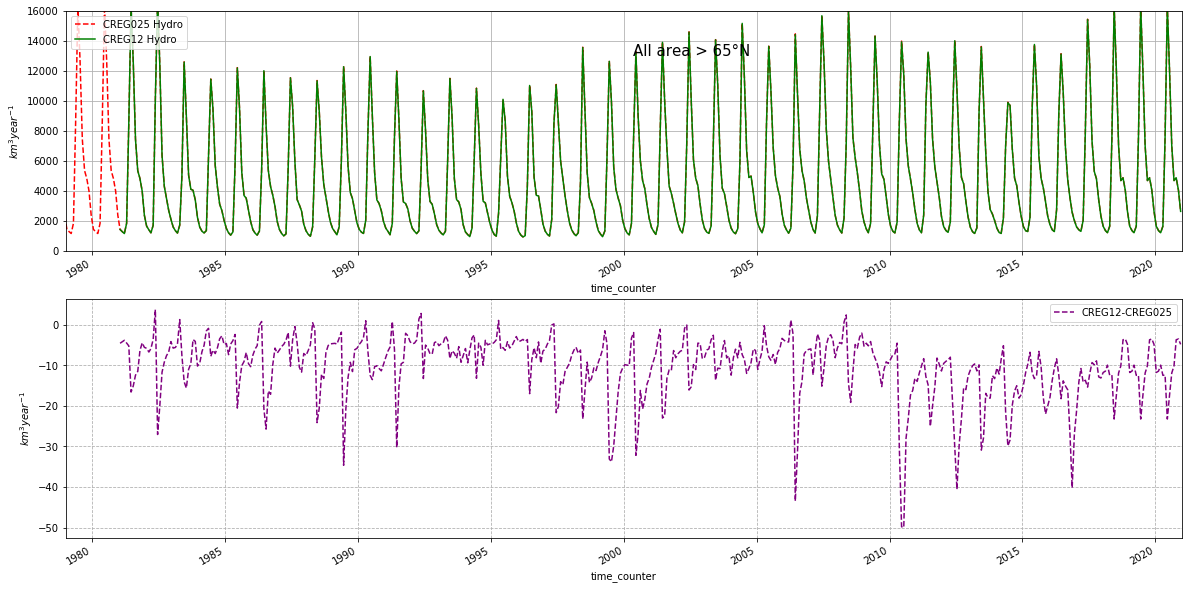

In [52]:
plt.figure(figsize=(20,15))

plt.subplot(311)
(ds_rnf_mon['sorunoff_sum_Arc']).plot(color='r',linestyle='dashed',label='CREG025 Hydro')
(ds_rnf_mon12['sorunoff_sum_Arc']).plot(color='g',label='CREG12 Hydro')
plt.text('2000.5',13000.,'All area > 65°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1979','2021'])
plt.ylim([0., 16000.])
plt.grid(True)
plt.legend()

plt.subplot(312)
(ds_rnf_mon12['sorunoff_sum_Arc']-ds_rnf_mon['sorunoff_sum_Arc']).plot\
(color='purple',linestyle='dashed',label='CREG12-CREG025')
#plt.text('2000.5',4000.,'All area > 65°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1979','2021'])
#plt.ylim([-6000., 6000.])
plt.grid(True,linestyle='dashed')
plt.legend()

savefig=False
if savefig: plt.savefig('./FIGURES/Runoff_CRE025_vs_CREG12_HYDROGFD_ArcticG65DegN_Monthly_y19902021.pdf')

> # Define a box over the Eurasian basin only 

In [49]:
tmsk_ARC_EURA=xr.where((ds_dfg['gphit'] <  65.), 0., tmask2D)
tmsk_ARC_EURA=xr.where((ds_dfg['gphit'] >  80.), 0., tmsk_ARC_EURA)
tmsk_ARC_EURA=xr.where((ds_dfg['glamt'] <  90.), 0., tmsk_ARC_EURA) 
tmsk_ARC_EURA=xr.where((ds_dfg['glamt'] > 180.), 0., tmsk_ARC_EURA) 

tmsk_ARC_EURA12=xr.where((ds_dfg12['gphit'] <  65.), 0., tmask2D12)
tmsk_ARC_EURA12=xr.where((ds_dfg12['gphit'] >  80.), 0., tmsk_ARC_EURA12)
tmsk_ARC_EURA12=xr.where((ds_dfg12['glamt'] <  90.), 0., tmsk_ARC_EURA12) 
tmsk_ARC_EURA12=xr.where((ds_dfg12['glamt'] > 180.), 0., tmsk_ARC_EURA12) 

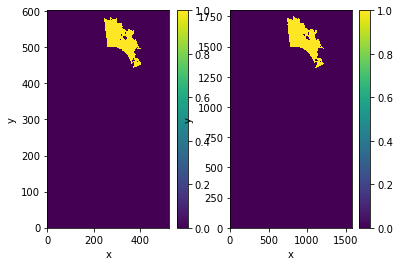

In [51]:
if True: 
    plt.subplot(121)
    tmsk_ARC_EURA.plot()
    plt.subplot(122)
    tmsk_ARC_EURA12.plot()

# > HYDROGFD data over the Eurasian box

In [73]:
ds_rnf_mon=Arc_sum(ds_rnfhpe,ds_dfg,tmsk_ARC_EURA,alpha,varout='sorunoff_sum_Eura')
ds_rnf_mon12=Arc_sum(ds_rnfhpe12,ds_dfg12,tmsk_ARC_EURA12,alpha,var='runoff',varout='sorunoff_sum_Eura')
ds_rnf_mon
ds_rnf_year['sorunoff_sum_Eura']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Eura'].resample(time_counter="1Y").mean())
ds_rnf_year12['sorunoff_sum_Eura']=(('time_counter'),ds_rnf_mon12['sorunoff_sum_Eura'].resample(time_counter="1Y").mean())

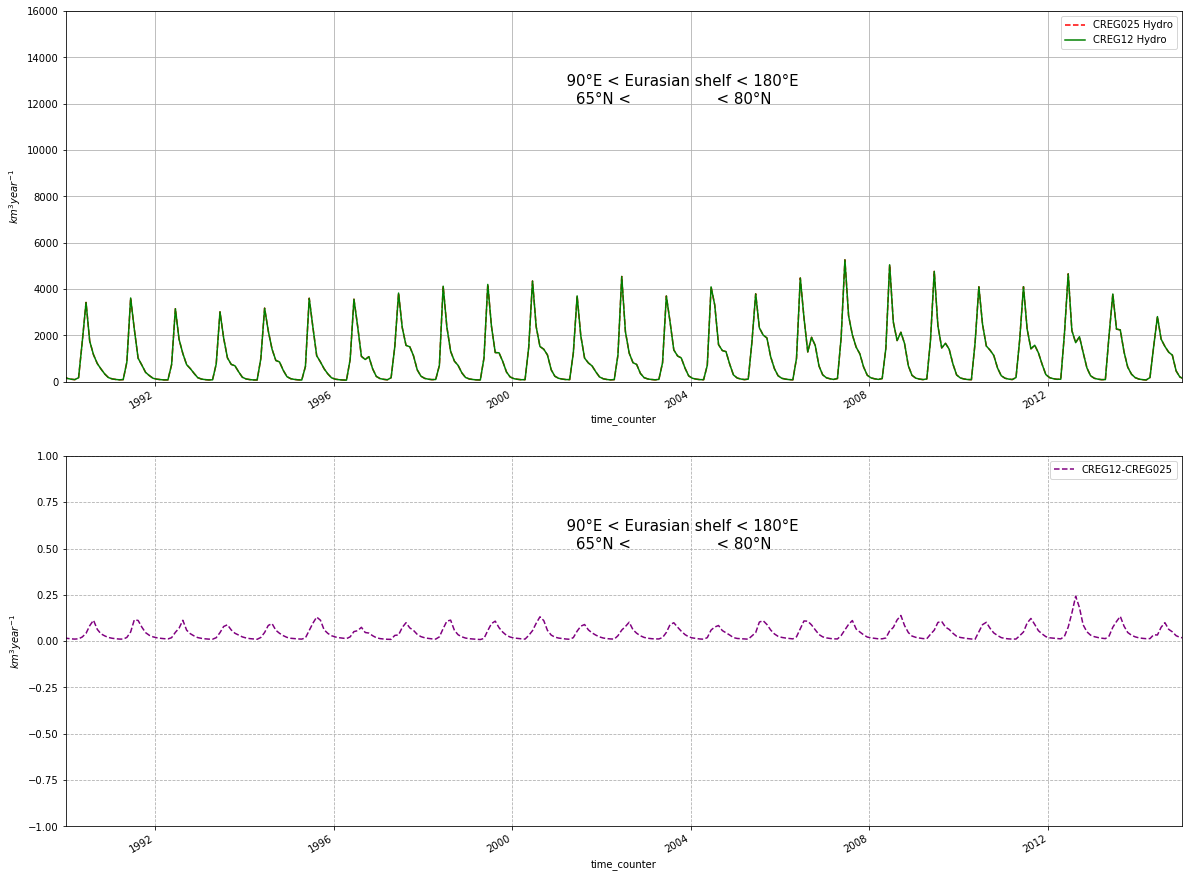

In [77]:
if True: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    (ds_rnf_mon['sorunoff_sum_Eura']).plot(color='r',linestyle='dashed',label='CREG025 Hydro')
    (ds_rnf_mon12['sorunoff_sum_Eura']).plot(color='g',label='CREG12 Hydro')
    plt.text('2001.',12000.,'  90°E < Eurasian shelf < 180°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1990','2015'])
    plt.ylim([0., 16000.])
    plt.grid(True)
    plt.legend()

    plt.subplot(212)
    (ds_rnf_mon12['sorunoff_sum_Eura']-ds_rnf_mon['sorunoff_sum_Eura']).plot\
    (color='purple',linestyle='dashed',label='CREG12-CREG025')
    plt.text('2001.',.5,'  90°E < Eurasian shelf < 180°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1990','2015'])
    plt.ylim([-1., 1.])
    plt.grid(True,linestyle='dashed')
    plt.legend()

    savefig=True
    if savefig: plt.savefig('./FIGURES/Runoff_CRE025_vs_CREG12_HYDROGFD_Eura65N-80N-90E-180E_Monthly_y19902021.pdf')

> # Define a box over the Barents & Kara areas 

In [58]:
tmsk_ARC_BAKA=xr.where((ds_dfg['gphit'] <  65.), 0., tmask2D)
tmsk_ARC_BAKA=xr.where((ds_dfg['gphit'] >  80.), 0., tmsk_ARC_BAKA)
tmsk_ARC_BAKA=xr.where((ds_dfg['glamt'] <   0.), 0., tmsk_ARC_BAKA) 
tmsk_ARC_BAKA=xr.where((ds_dfg['glamt'] >  90.), 0., tmsk_ARC_BAKA) 

tmsk_ARC_BAKA12=xr.where((ds_dfg12['gphit'] <  65.), 0., tmask2D12)
tmsk_ARC_BAKA12=xr.where((ds_dfg12['gphit'] >  80.), 0., tmsk_ARC_BAKA12)
tmsk_ARC_BAKA12=xr.where((ds_dfg12['glamt'] <   0.), 0., tmsk_ARC_BAKA12) 
tmsk_ARC_BAKA12=xr.where((ds_dfg12['glamt'] >  90.), 0., tmsk_ARC_BAKA12) 

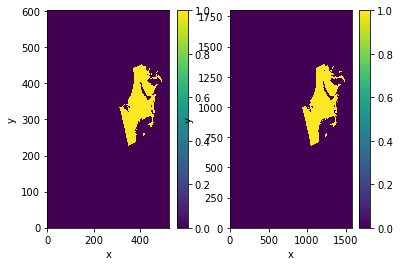

In [59]:
if True: 
    plt.subplot(121)
    tmsk_ARC_BAKA.plot()
    plt.subplot(122)
    tmsk_ARC_BAKA12.plot()

# > ISBA data over the Barents & Kara areas

In [71]:
ds_rnf_mon=Arc_sum(ds_rnfhpe,ds_dfg,tmsk_ARC_BAKA,alpha,varout='sorunoff_sum_Baka')
ds_rnf_mon12=Arc_sum(ds_rnfhpe12,ds_dfg12,tmsk_ARC_BAKA12,alpha,var='runoff',varout='sorunoff_sum_Baka')
ds_rnf_mon
ds_rnf_year['sorunoff_sum_Baka']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Baka'].resample(time_counter="1Y").mean())
ds_rnf_year12['sorunoff_sum_Baka']=(('time_counter'),ds_rnf_mon12['sorunoff_sum_Baka'].resample(time_counter="1Y").mean())

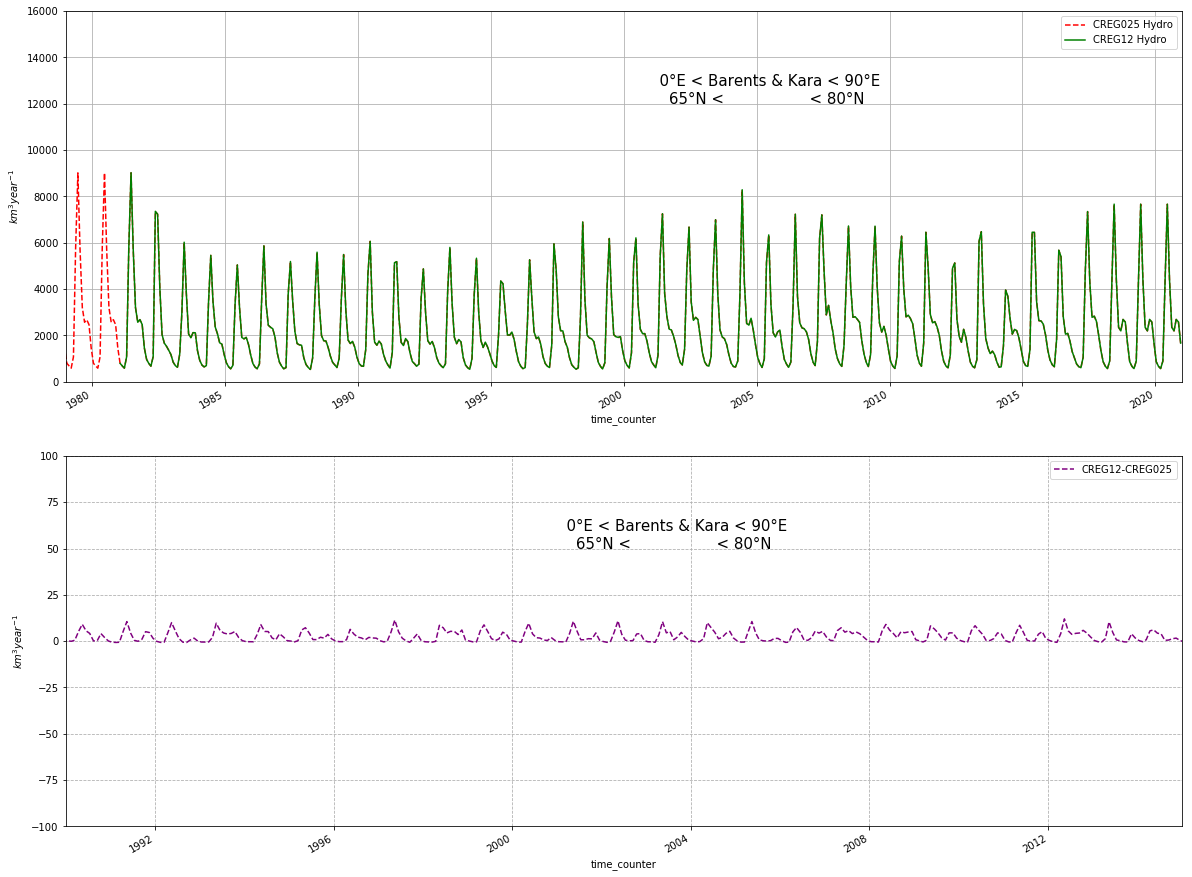

In [72]:
if True: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    (ds_rnf_mon['sorunoff_sum_Baka']).plot(color='r',linestyle='dashed',label='CREG025 Hydro')
    (ds_rnf_mon12['sorunoff_sum_Baka']).plot(color='g',label='CREG12 Hydro')
    plt.text('2001.',12000.,'  0°E < Barents & Kara < 90°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1979','2021'])
    plt.ylim([0., 16000.])
    plt.grid(True)
    plt.legend()

    plt.subplot(212)
    (ds_rnf_mon12['sorunoff_sum_Baka']-ds_rnf_mon['sorunoff_sum_Baka']).plot\
    (color='purple',linestyle='dashed',label='CREG12-CREG025')
    plt.text('2001.',50.,'  0°E < Barents & Kara < 90°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1990','2015'])
    plt.ylim([-100., 100.])
    plt.grid(True,linestyle='dashed')
    plt.legend()

    savefig=True
    if savefig: plt.savefig('./FIGURES/Runoff_CRE025_vs_CREG12_HYDROGFD_BarentsKara65N-80N-0E-90E_Monthly_y19902021.pdf')

> # Define a box over the Greenland & CAA areas 

In [62]:
tmsk_ARC_GRCA=xr.where((ds_dfg['gphit'] <  65.), 0., tmask2D)
tmsk_ARC_GRCA=xr.where((ds_dfg['gphit'] >  80.), 0., tmsk_ARC_GRCA)
tmsk_ARC_GRCA=xr.where((ds_dfg['glamt'] < -120.), 0., tmsk_ARC_GRCA) 
tmsk_ARC_GRCA=xr.where((ds_dfg['glamt'] >    0.), 0., tmsk_ARC_GRCA) 

tmsk_ARC_GRCA12=xr.where((ds_dfg12['gphit'] <  65.), 0., tmask2D12)
tmsk_ARC_GRCA12=xr.where((ds_dfg12['gphit'] >  80.), 0., tmsk_ARC_GRCA12)
tmsk_ARC_GRCA12=xr.where((ds_dfg12['glamt'] < -120.), 0., tmsk_ARC_GRCA12) 
tmsk_ARC_GRCA12=xr.where((ds_dfg12['glamt'] >    0.), 0., tmsk_ARC_GRCA12) 

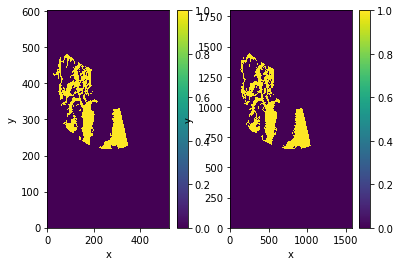

In [63]:
if True: 
    plt.subplot(121)
    tmsk_ARC_GRCA.plot()
    plt.subplot(122)
    tmsk_ARC_GRCA12.plot()

# > ISBA data over the Greenland & CAA areas

In [64]:
ds_rnf_mon=Arc_sum(ds_rnfhpe,ds_dfg,tmsk_ARC_GRCA,alpha,varout='sorunoff_sum_Grca')
ds_rnf_mon12=Arc_sum(ds_rnfhpe12,ds_dfg12,tmsk_ARC_GRCA12,alpha,var='runoff',varout='sorunoff_sum_Grca')
ds_rnf_mon
ds_rnf_year['sorunoff_sum_Grca']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Grca'].resample(time_counter="1Y").mean())
ds_rnf_year12['sorunoff_sum_Grca']=(('time_counter'),ds_rnf_mon12['sorunoff_sum_Grca'].resample(time_counter="1Y").mean())

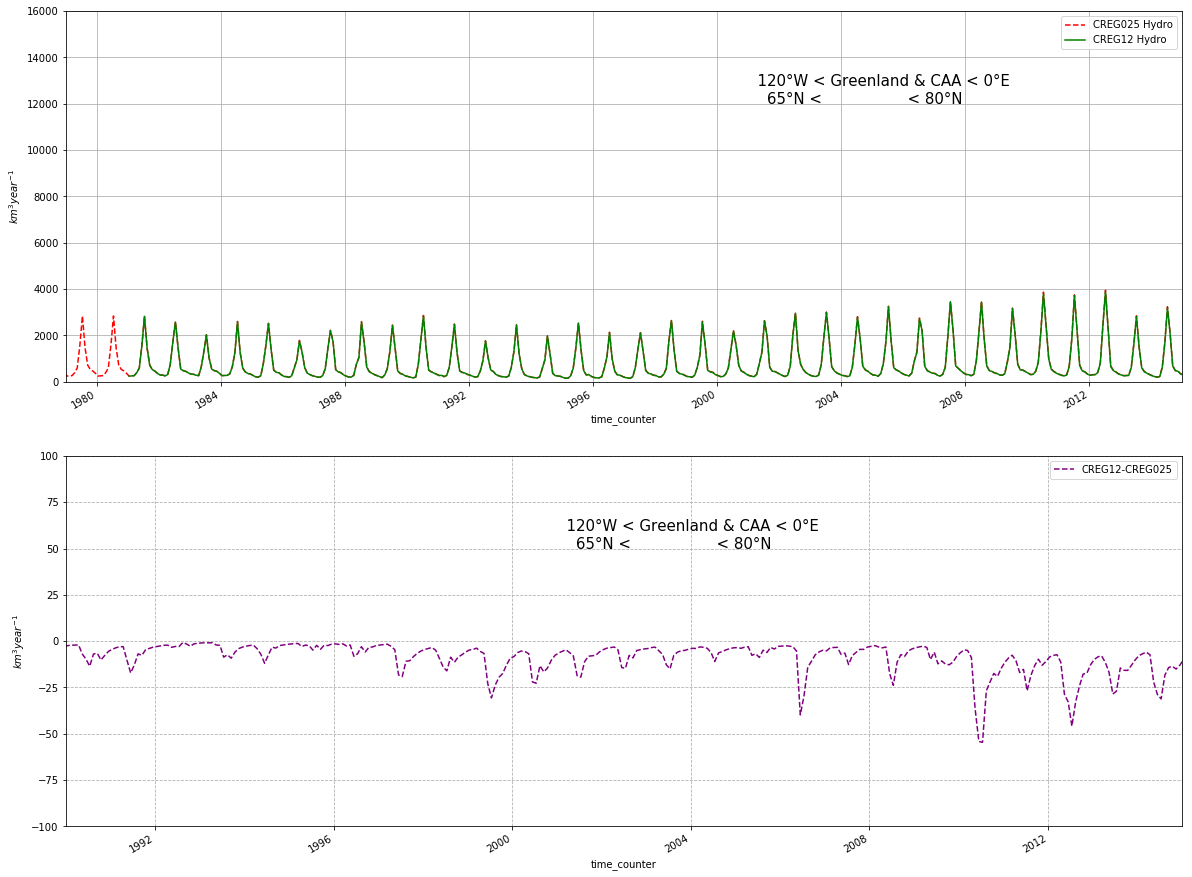

In [69]:
plt.figure(figsize=(20,15))

plt.subplot(211)
(ds_rnf_mon['sorunoff_sum_Grca']).plot(color='r',linestyle='dashed',label='CREG025 Hydro')
(ds_rnf_mon12['sorunoff_sum_Grca']).plot(color='g',label='CREG12 Hydro')
plt.text('2001.',12000.,'  120°W < Greenland & CAA < 0°E \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1979','2015'])
plt.ylim([0., 16000.])
plt.grid(True)
plt.legend()

plt.subplot(212)
(ds_rnf_mon12['sorunoff_sum_Grca']-ds_rnf_mon['sorunoff_sum_Grca']).plot\
(color='purple',linestyle='dashed',label='CREG12-CREG025')
plt.text('2001.',50.,'  120°W < Greenland & CAA < 0°E \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1990','2015'])
plt.ylim([-100., 100.])
plt.grid(True,linestyle='dashed')
plt.legend()

savefig=True
if savefig: plt.savefig('./FIGURES/Runoff_CRE025_vs_CREG12_HYDROGFD_GreenlandCAA65N-80N-0E-120W_Monthly_y19902021.pdf')

> # Define a box over the Alaska & Bering areas 

In [66]:
tmsk_ARC_ALBE=xr.where((ds_dfg['gphit'] <  65.), 0., tmask2D)
tmsk_ARC_ALBE=xr.where((ds_dfg['gphit'] >  80.), 0., tmsk_ARC_ALBE)
tmsk_ARC_ALBE=xr.where((ds_dfg['glamt'] < -180.), 0., tmsk_ARC_ALBE) 
tmsk_ARC_ALBE=xr.where((ds_dfg['glamt'] > -120.), 0., tmsk_ARC_ALBE) 

tmsk_ARC_ALBE12=xr.where((ds_dfg12['gphit'] <  65.), 0., tmask2D12)
tmsk_ARC_ALBE12=xr.where((ds_dfg12['gphit'] >  80.), 0., tmsk_ARC_ALBE12)
tmsk_ARC_ALBE12=xr.where((ds_dfg12['glamt'] < -180.), 0., tmsk_ARC_ALBE12) 
tmsk_ARC_ALBE12=xr.where((ds_dfg12['glamt'] > -120.), 0., tmsk_ARC_ALBE12) 

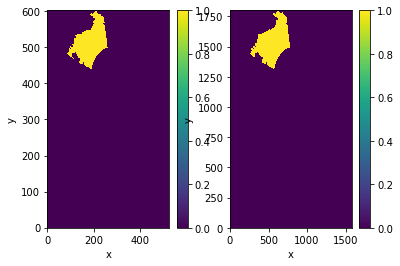

In [75]:
if True: 
    plt.subplot(121)
    tmsk_ARC_ALBE.plot()
    plt.subplot(122)
    tmsk_ARC_ALBE12.plot()

# > ISBA data over the Alaska & Bering areas

In [78]:
ds_rnf_mon=Arc_sum(ds_rnfhpe,ds_dfg,tmsk_ARC_ALBE,alpha,varout='sorunoff_sum_Albe')
ds_rnf_mon12=Arc_sum(ds_rnfhpe12,ds_dfg12,tmsk_ARC_ALBE12,alpha,var='runoff',varout='sorunoff_sum_Albe')
ds_rnf_mon
ds_rnf_year['sorunoff_sum_Albe']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Albe'].resample(time_counter="1Y").mean())
ds_rnf_year12['sorunoff_sum_Albe']=(('time_counter'),ds_rnf_mon12['sorunoff_sum_Albe'].resample(time_counter="1Y").mean())

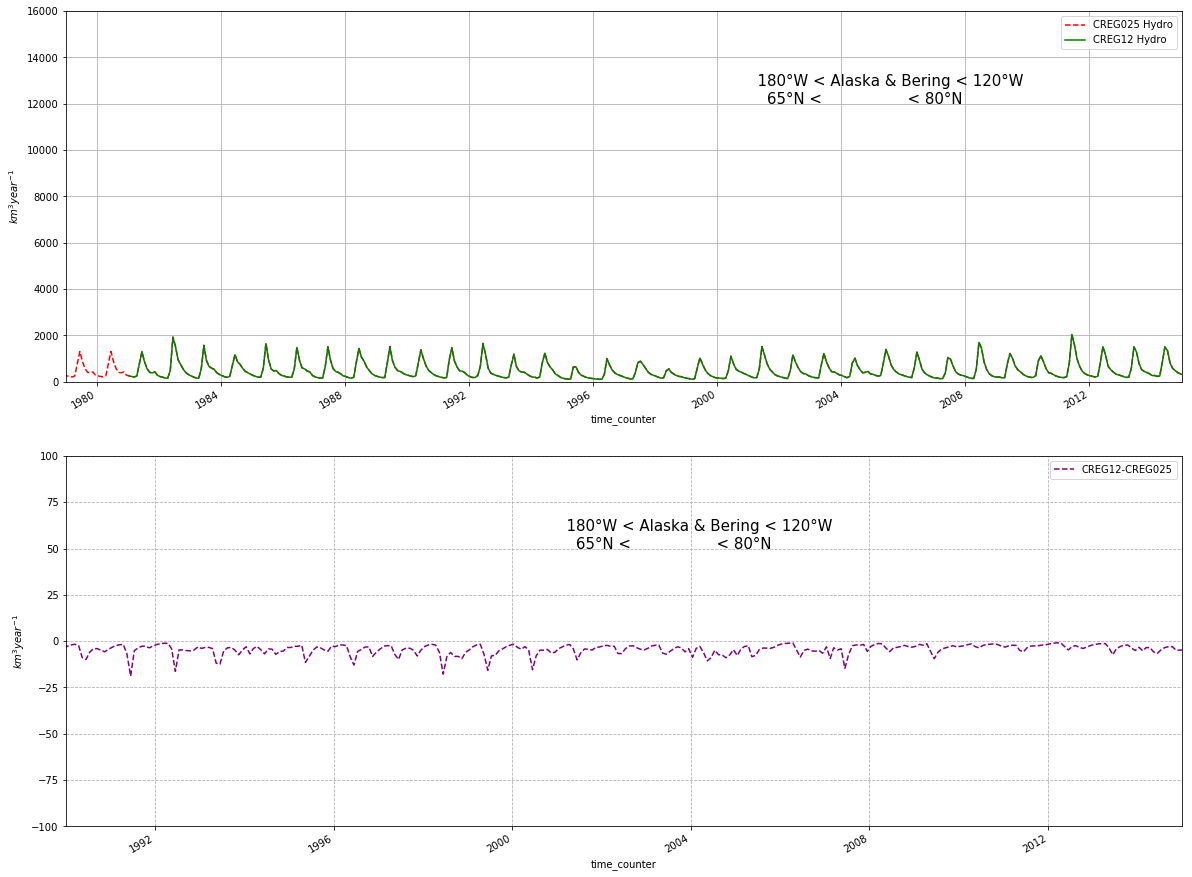

In [80]:
plt.figure(figsize=(20,15))

plt.subplot(211)
(ds_rnf_mon['sorunoff_sum_Albe']).plot(color='r',linestyle='dashed',label='CREG025 Hydro')
(ds_rnf_mon12['sorunoff_sum_Albe']).plot(color='g',label='CREG12 Hydro')
plt.text('2001.',12000.,'  180°W < Alaska & Bering < 120°W \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1979','2015'])
plt.ylim([0., 16000.])
plt.grid(True)
plt.legend()

plt.subplot(212)
(ds_rnf_mon12['sorunoff_sum_Albe']-ds_rnf_mon['sorunoff_sum_Albe']).plot\
(color='purple',linestyle='dashed',label='CREG12-CREG025')
plt.text('2001.',50.,'  180°W < Alaska & Bering < 120°W \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1990','2015'])
plt.ylim([-100., 100.])
plt.grid(True,linestyle='dashed')
plt.legend()

savefig=True
if savefig: plt.savefig('./FIGURES/Runoff_CRE025_vs_CREG12_HYDROGFD_AlskaBering65N-80N-120W-180W_Monthly_y19902021.pdf')

In [48]:
# Save the corrected velocity field
# Ref experiment data
DATAOUT='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG12.L75/DATA_FORCING/RUNOFFS/HYDROGFD/'
DATAINI='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG025.L75/DATA_FORCING/RUNOFFS/HYDROGFD/'

donetcdf=False
if donetcdf: 

    for year in set(np.arange(1981,2021)):
        print('          >>>>>>>  year:',year)
        
        ds_Glo=xr.open_dataset(DATAINI+'CREG025_ReNat_HydroGFD_HBC_runoff_monthly_y'+str(year)+'.nc',decode_times=False)

        
        ds_out=xr.Dataset()  
        ds_out['sorunoff']= (('time_counter','y','x'),ds_rnfhpe12['runoff'].sel(time_counter=str(year)))
        ds_out['sorunoff'].attrs['units']=ds_Glo['sorunoff'].attrs['units']
        
        ds_out['socoefr']=(('y','x'),ds_rnfhpe12['socoefr'])

        ds_out.coords['nav_lat']=(('y','x'),ds_rnfhpe12['nav_lat'])
        ds_out.coords['nav_lon']=(('y','x'),ds_rnfhpe12['nav_lon'])
        ds_out.coords['time_counter']=(('time_counter'),\
                                       pd.date_range(start=str(year)+'-01',end=str(year)+'-12',\
                                       freq='MS')+pd.DateOffset(days=14))

        ds_out.attrs=ds_Glo.attrs
        fileout='CREG12_ReNat_HydroGFD_HBC_runoff_monthly_y'+str(year)+'.nc'

        ds_out.to_netcdf(DATAOUT+fileout, unlimited_dims={'time_counter':True})

          >>>>>>>  year: 1981
          >>>>>>>  year: 1982
          >>>>>>>  year: 1983
          >>>>>>>  year: 1984
          >>>>>>>  year: 1985
          >>>>>>>  year: 1986
          >>>>>>>  year: 1987
          >>>>>>>  year: 1988
          >>>>>>>  year: 1989
          >>>>>>>  year: 1990
          >>>>>>>  year: 1991
          >>>>>>>  year: 1992
          >>>>>>>  year: 1993
          >>>>>>>  year: 1994
          >>>>>>>  year: 1995
          >>>>>>>  year: 1996
          >>>>>>>  year: 1997
          >>>>>>>  year: 1998
          >>>>>>>  year: 1999
          >>>>>>>  year: 2000
          >>>>>>>  year: 2001
          >>>>>>>  year: 2002
          >>>>>>>  year: 2003
          >>>>>>>  year: 2004
          >>>>>>>  year: 2005
          >>>>>>>  year: 2006
          >>>>>>>  year: 2007
          >>>>>>>  year: 2008
          >>>>>>>  year: 2009
          >>>>>>>  year: 2010
          >>>>>>>  year: 2011
          >>>>>>>  year: 2012
          >>>>>>>  year: 2013
          